## Data Overview

In [20]:

#To predict the Titanic Survival using KNN

# Importing required Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv('titanic3.csv')

titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [21]:
# to find out the number of rows and column in the dataset

titanic.shape

(1310, 14)

In [22]:
#Using correlation function to find out the linear correlation between survived and other numerical features

corr_matrix = titanic.corr()
corr_matrix['survived'].sort_values(ascending=False)

survived    1.000000
fare        0.244265
parch       0.082660
sibsp      -0.027825
age        -0.055513
pclass     -0.312469
body             NaN
Name: survived, dtype: float64

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [24]:
titanic['embarked']=titanic['embarked'].fillna('S')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1310 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


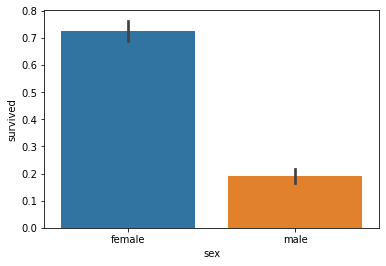

In [25]:
# creating a barplot to compare the number of survials based on gender

sns.barplot(
    data = titanic,
    x = 'sex',
    y = 'survived'
)
plt.show()

# We see that there are more female survives compared to male

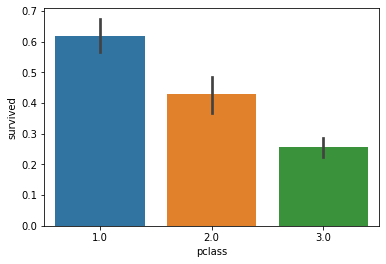

In [26]:
# creating a barplot to compare the number of survials based on pclass (Passenager Class)

sns.barplot(
    data = titanic,
    x='pclass',
    y='survived'
)
plt.show()

# As seen passengers from 1st class has the highest survial rate (62%) compared to 2nd (40%) or 3rd (25%) class

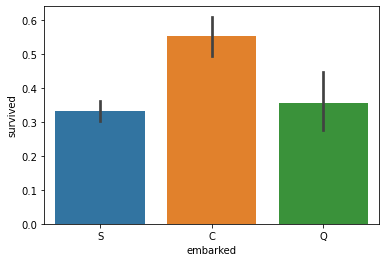

In [27]:
# creating a barplot to compare the number of survials based on the place where passengers boarded (embarked)

sns.barplot(
    data = titanic,
    x='embarked',
    y='survived'
)
plt.show()

#We see that major passengers who boarded from Cherbourg has the highest survival campared to others.

## Data Preparation

In [58]:
a = ['name','cabin','sibsp','parch','age','boat','home.dest','body']
titanic_set = titanic.drop(a, axis=1)
titanic_set.head()

,pclass,survived,sex,ticket,fare,embarked
0,1.0,1.0,female,24160,211.3375,S
1,1.0,1.0,male,113781,151.5500,S
2,1.0,0.0,female,113781,151.5500,S
3,1.0,0.0,male,113781,151.5500,S
4,1.0,0.0,female,113781,151.5500,S


In [59]:
mean = titanic_set['fare'].mean()
titanic_set['fare']= titanic_set['fare'].fillna(mean)
titanic_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   sex       1309 non-null   object 
 3   ticket    1309 non-null   object 
 4   fare      1310 non-null   float64
 5   embarked  1310 non-null   object 
dtypes: float64(3), object(3)
memory usage: 61.5+ KB


In [64]:
#converting non numerical values

from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()

titanic_set.iloc[:,0]= labelencoder.fit_transform(titanic_set.iloc[:,0].values)
titanic_set.iloc[:,1]= labelencoder.fit_transform(titanic_set.iloc[:,1].values)
titanic_set.iloc[:,3]= labelencoder.fit_transform(titanic_set.iloc[:,2].values)
titanic_set.iloc[:,5]= labelencoder.fit_transform(titanic_set.iloc[:,4].values)


titanic_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pclass    1310 non-null   int64
 1   survived  1310 non-null   int64
 2   sex       1310 non-null   int64
 3   ticket    1310 non-null   int64
 4   fare      1310 non-null   int64
 5   embarked  1310 non-null   int64
dtypes: int64(6)
memory usage: 61.5 KB


# To Split titanic_set

In [65]:
from sklearn.model_selection import train_test_split

X=titanic_set.iloc[:,1:5].values
Y= titanic_set.iloc[:,0].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state=4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(786, 4)
(524, 4)
(786,)
(524,)


# To Find nearest K model (KNN)

In [67]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier


In [68]:
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
print(scores)


[0.9179389312977099, 0.8912213740458015, 0.8587786259541985, 0.8606870229007634, 0.8435114503816794, 0.8625954198473282, 0.8377862595419847, 0.8301526717557252, 0.8206106870229007, 0.8206106870229007, 0.8187022900763359, 0.8148854961832062, 0.8091603053435115, 0.8053435114503816, 0.8034351145038168, 0.816793893129771, 0.8225190839694656, 0.8187022900763359, 0.8206106870229007, 0.8244274809160306, 0.8282442748091603, 0.8263358778625954, 0.8301526717557252, 0.8282442748091603, 0.8301526717557252]


Text(0, 0.5, 'Testing Accuracy')

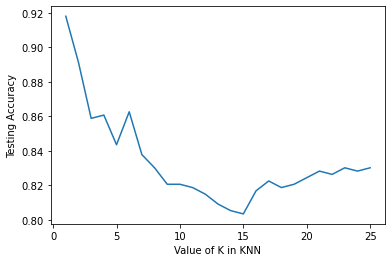

In [69]:
plt.plot(k_range, scores)
plt.xlabel('Value of K in KNN')
plt.ylabel('Testing Accuracy')

#Kvalue is taken as 5

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
print (metrics.accuracy_score(y_test,y_pred))

0.8625954198473282


In [79]:
test = titanic_set.iloc[:,1:5].values

In [80]:
knn =KNeighborsClassifier(n_neighbors=1)
knn.fit(X,Y)
Y_pred = knn.predict(test)

sunmission = pd.DataFrame({
    "ticket": titanic_set['ticket'],
    "survived": Y_pred
})